In [63]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

np.random.seed(28)

%matplotlib inline

In [2]:
ames_df = pd.read_csv('./train.csv')

In [3]:
ames_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
ames_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [5]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

(array([  2.,   3.,   5.,  11.,  21.,  39.,  61.,  87., 138., 200., 204.,
        184., 138., 159., 133.,  82.,  92.,  72.,  58.,  46.,  44.,  40.,
         35.,  33.,  16.,  28.,  18.,  16.,  10.,   7.,  12.,  10.,   4.,
         10.,   4.,   3.,   5.,   4.,   3.,   1.,   3.,   0.,   0.,   2.,
          1.,   3.,   0.,   2.,   1.,   1.]),
 array([ 12789.  ,  24766.36,  36743.72,  48721.08,  60698.44,  72675.8 ,
         84653.16,  96630.52, 108607.88, 120585.24, 132562.6 , 144539.96,
        156517.32, 168494.68, 180472.04, 192449.4 , 204426.76, 216404.12,
        228381.48, 240358.84, 252336.2 , 264313.56, 276290.92, 288268.28,
        300245.64, 312223.  , 324200.36, 336177.72, 348155.08, 360132.44,
        372109.8 , 384087.16, 396064.52, 408041.88, 420019.24, 431996.6 ,
        443973.96, 455951.32, 467928.68, 479906.04, 491883.4 , 503860.76,
        515838.12, 527815.48, 539792.84, 551770.2 , 563747.56, 575724.92,
        587702.28, 599679.64, 611657.  ]),
 <a list of 50 Patch ob

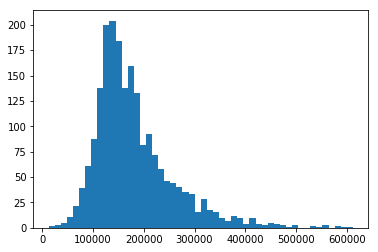

In [6]:
plt.hist(ames_df['SalePrice'], bins=50)

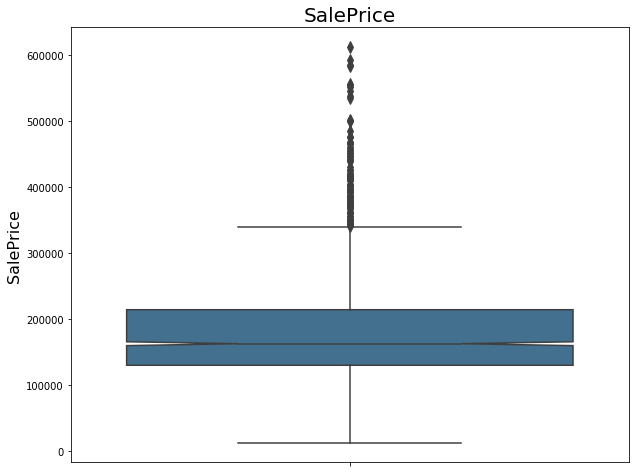

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

ax = sns.boxplot(ames_df['SalePrice'], orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('SalePrice', fontsize=16)
ax.set_title('SalePrice', fontsize=20)

plt.show()

In [8]:
(ames_df['SalePrice'] > 500000).sum()

12

In [14]:
price_mask = (ames_df['SalePrice'] > 400000)

In [15]:
ames_df[price_mask]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
41,2383,528110050,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,465000
81,367,527214050,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2009,New,501837
138,2331,527210040,60,RL,60.0,18062,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2006,New,545224
151,2333,527212030,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2006,New,556581
190,2330,527210030,60,RL,59.0,16023,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,3,2006,New,457347
286,960,916382100,20,RL,113.0,13438,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,7,2009,WD,410000
328,1773,528366050,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,430000
332,1060,528118090,60,RL,96.0,12539,Pave,NaN,Reg,Lvl,...,192,0,NaN,NaN,NaN,0,6,2008,WD,460000
361,1701,528118040,60,RL,118.0,13654,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,418000
465,1765,528340030,60,RL,89.0,10557,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,410000


In [11]:
ames_df.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [17]:
ames_df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [19]:
ames_df['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [39]:
ames_corr = ames_df.corr()

LotArea, OverallQual, GrLivArea, Bedroom, FullBath

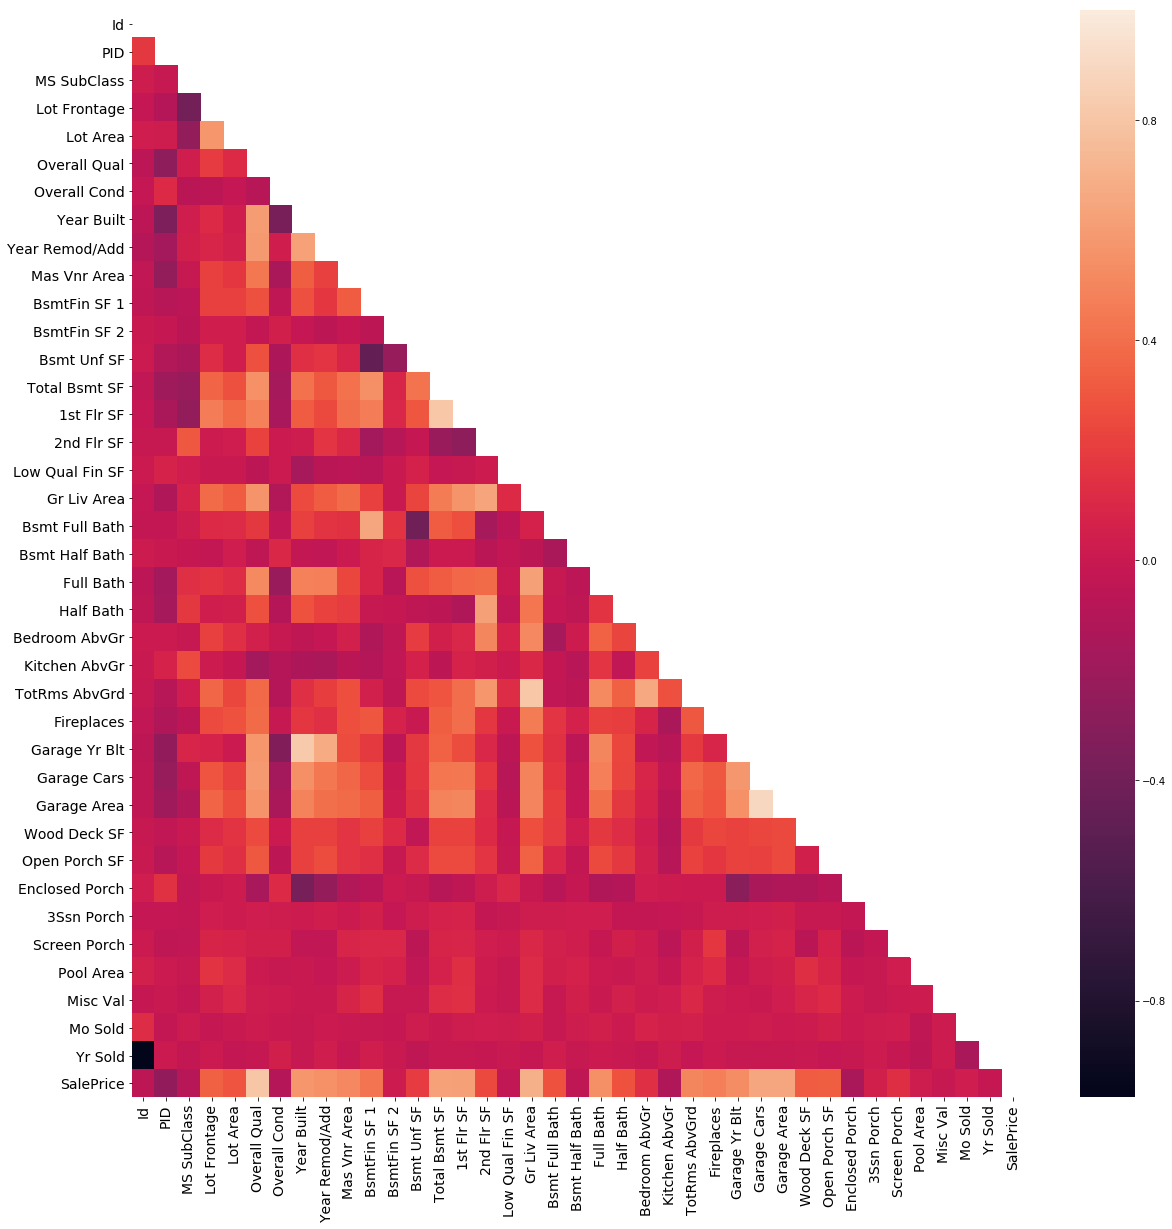

In [41]:
fix, ax = plt.subplots(figsize=(20,20))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(ames_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(ames_corr, mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [48]:
(ames_df['Lot Area']).isnull().sum()

0

In [53]:
features = ['Lot Area', 'Overall Qual', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr']
X = ames_df[features]
y = ames_df['SalePrice']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

In [60]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [61]:
lr = LinearRegression()

In [68]:
kf = KFold(n_splits=5, random_state=28, shuffle=True)
cross_val_score(lr, X_train_scaled, y_train, cv=kf).mean()

0.74225282941748

In [66]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
lr.score(X_test_scaled, y_test)

0.7442813344641185

In [70]:
test_df = pd.read_csv('./test.csv')
test_scaled = ss.transform(test_df[features])
y_hat = lr.predict(test_scaled)

In [76]:
solution = pd.DataFrame({'SalePrice': y_hat}, index=test_df['Id'])
solution.to_csv('./solution1')